<a href="https://colab.research.google.com/github/aleksejalex/DYNR1cv_internal/blob/main/DYNR1cv_01_BayesNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DYNR1cv - Bayesian nets.

Prepared by: *Aleksej Gaj* ([email](mailto:aleksejalex@gmail.com))

This material was inspired by the documentation of `bnlearn` library: [here](https://erdogant.github.io/bnlearn/pages/html/Examples.html#parameter-learning)


Note:
 - CPT = conditional probability distribution
 - DAG = direct acyclic graph

## installing library `bnlearn`

In [1]:
%%capture
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
%%capture
!pip install pandas --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 36.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [3]:
%%capture
!pip install d3blocks --upgrade

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 131.3 MB/s eta 0:00:00
  Created wheel for markupsafe: filename=MarkupSafe-2.0.1-cp311-cp311-linux_x86_64.whl size=27995 sha256=318e39f5614724c73ac3669d17295849879b0f5b45359a6cff957e4233473dbe
  Stored in directory: /root/.cache/pip/wheels/ea/18/79/6266ea508b8164a77b95aa19534c77eb805f2878612c37efca
Successfully built markupsafe
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
goog

In [4]:
%%capture
%pip install bnlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 64.5 MB/s eta 0:00:00


In [5]:
#%%capture
%pip install d3blocks

## imports

In [1]:
import bnlearn as bn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## `sprinkler` example

**Setup:** imagine we have data observed and some prior/expert knowledge about the process (relation between nodes).

**Aim:** to create Directed Acyclic Graph (DAG) on the expert knowledge and learn the conditional proability distributions (CPDs) from data.

Code below shows how to:
 - import data
 - define graph (which reflects prior knowledge about process)
 - compute/update probabilities using data
 - plot the graph/sheme
 - make an inference (i.e. to predict)

In [2]:
df = bn.import_example('sprinkler')
df.head(4)

,Cloudy,Sprinkler,Rain,Wet_Grass
0,0,0,0,0
1,1,0,1,1
2,0,1,0,1
3,1,1,1,1


This is how dataset looks like:

In [3]:
df.describe(include='all')

,Cloudy,Sprinkler,Rain,Wet_Grass
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.512000,0.309000,0.515000,0.653000
std,0.500106,0.462312,0.500025,0.476254
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


Define the network structure. This can be based on expert knowledge. Basically we specify connection between cause and efect (future edges in DAG):

In [4]:
edges = [('Cloudy', 'Sprinkler'),
         ('Cloudy', 'Rain'),
         ('Sprinkler', 'Wet_Grass'),
         ('Rain', 'Wet_Grass')]

Make the Bayesian DAG from specified connections (edges):

In [5]:
DAG = bn.make_DAG(edges)

[bnlearn] >bayes DAG created.


Plot the DAG

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Warning: [graphviz_layout] layout not found. The layout [spring_layout] is used instead.


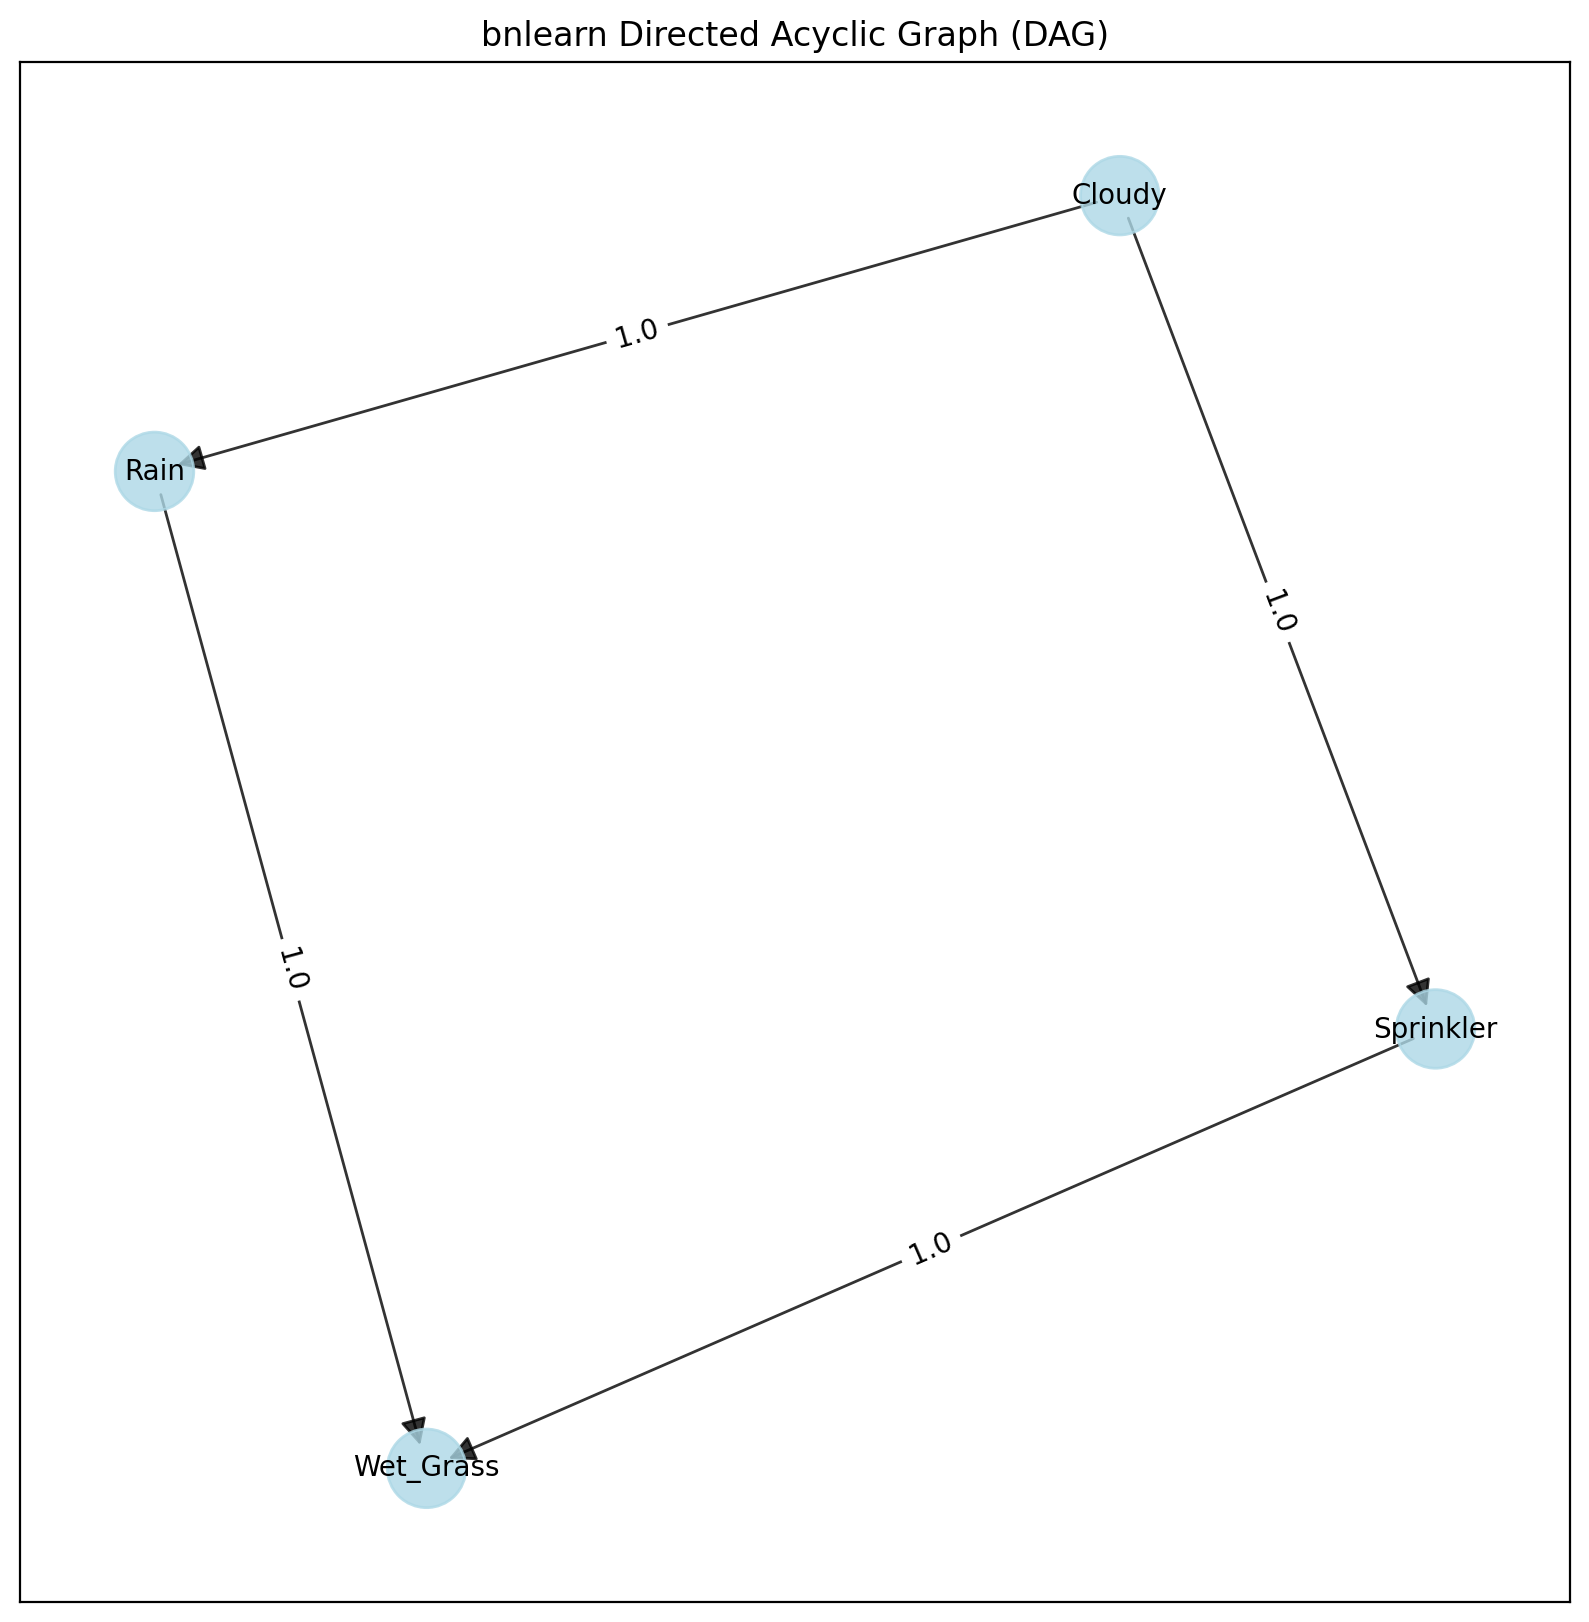

{'fig': <Figure size 2000x2000 with 1 Axes>,
 'ax': <Figure size 2000x2000 with 1 Axes>,
 'pos': {'Cloudy': array([0.39939497, 0.879187  ]),
  'Sprinkler': array([ 0.77498582, -0.35120935]),
  'Rain': array([-0.74903852,  0.47202236]),
  'Wet_Grass': array([-0.42534227, -1.        ])},
 'G': <networkx.classes.digraph.DiGraph at 0x282c3ef6de0>,
 'node_properties': {'Cloudy': {'node_color': '#ADD8E6', 'node_size': 800},
  'Sprinkler': {'node_color': '#ADD8E6', 'node_size': 800},
  'Rain': {'node_color': '#ADD8E6', 'node_size': 800},
  'Wet_Grass': {'node_color': '#ADD8E6', 'node_size': 800}},
 'edge_properties': {('Cloudy', 'Sprinkler'): {'color': '#000000',
   'weight': 1.0,
   'pvalue': 1,
   'value': 1.0},
  ('Cloudy', 'Rain'): {'color': '#000000',
   'weight': 1.0,
   'pvalue': 1,
   'value': 1.0},
  ('Sprinkler', 'Wet_Grass'): {'color': '#000000',
   'weight': 1.0,
   'pvalue': 1,
   'value': 1.0},
  ('Rain', 'Wet_Grass'): {'color': '#000000',
   'weight': 1.0,
   'pvalue': 1,
   'v

In [6]:
bn.plot(model=DAG, interactive=False)

Let's do it in more beautiful way:

In [14]:
bn.plot_graphviz(DAG)

02-04-25 00:46:56 [setgraphviz.setgraphviz]> INFO    > System found: windows
02-04-25 00:46:56 [setgraphviz.setgraphviz]> INFO    > Graphviz path found in environment.


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Parameter learning on the user-defined DAG and input data using maximum likelihood.

In [8]:
DAG = bn.parameter_learning.fit(DAG, df, methodtype='maximumlikelihood')

[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >CPD of Cloudy:
+-----------+-------+
| Cloudy(0) | 0.488 |
+-----------+-------+
| Cloudy(1) | 0.512 |
+-----------+-------+
[bnlearn] >CPD of Sprinkler:
+--------------+--------------------+------------+
| Cloudy       | Cloudy(0)          | Cloudy(1)  |
+--------------+--------------------+------------+
| Sprinkler(0) | 0.4610655737704918 | 0.91015625 |
+--------------+--------------------+------------+
| Sprinkler(1) | 0.5389344262295082 | 0.08984375 |
+--------------+--------------------+------------+
[bnlearn] >CPD of Rain:
+---------+---------------------+-------------+
| Cloudy  | Cloudy(0)           | Cloudy(1)   |
+---------+---------------------+-------------+
| Rain(0) | 0.8073770491803278  | 0.177734375 |
+---------+---------------------+-------------+
| Rain(1) | 0.19262295081967212 | 0.822265625 |
+---------+---------------------+-------------+
[bnlearn] >CPD of Wet_Grass:
+----------

**How to understand these tables?** Let's understand it on the example of CPD of Sprinkler:

```
+--------------+--------------------+------------+
| Cloudy       | Cloudy(0)          | Cloudy(1)  |
+--------------+--------------------+------------+
| Sprinkler(0) | 0.4610655737704918 | 0.91015625 |
+--------------+--------------------+------------+
| Sprinkler(1) | 0.5389344262295082 | 0.08984375 |
+--------------+--------------------+------------+
```
`Cloudy` is condition, `Sprinkler` is the event of interest. Numbers represent the probability of sprinkler being in state `Sprinkler(i)` when sky is in state `Cloudy(j)`, for example:

$$   P\left( \:\text{Sprinkler(0)}\: |\: \text{Cloudy(0)} \:\right) \approx 0.46  $$



In [9]:
DAG

{'model': <pgmpy.models.BayesianNetwork.BayesianNetwork at 0x282921676e0>,
 'adjmat': target     Cloudy  Sprinkler   Rain  Wet_Grass
 source                                        
 Cloudy      False       True   True      False
 Sprinkler   False      False  False       True
 Rain        False      False  False       True
 Wet_Grass   False      False  False      False,
 'config': {'verbose': 3, 'method': 'maximumlikelihood', 'n_jobs': -1},
 'model_edges': [('Cloudy', 'Sprinkler'),
  ('Cloudy', 'Rain'),
  ('Sprinkler', 'Wet_Grass'),
  ('Rain', 'Wet_Grass')],
 'structure_scores': {'k2': -1952.7499005180107,
  'bic': -1953.219110059786,
  'bdeu': -1954.4304910940116,
  'bds': -1961.361962899611},
 'independence_test': None}

Lets print the learned CPDs:

In [10]:
CPDs = bn.print_CPD(DAG)

[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+----------+-------+
|    |   Cloudy |     p |
+====+==========+=======+
|  0 |        0 | 0.488 |
+----+----------+-------+
|  1 |        1 | 0.512 |
+----+----------+-------+
CPD of Cloudy:
+-----------+-------+
| Cloudy(0) | 0.488 |
+-----------+-------+
| Cloudy(1) | 0.512 |
+-----------+-------+
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-------------+----------+-----------+
|    |   Sprinkler |   Cloudy |         p |
+====+=============+==========+===========+
|  0 |           0 |        0 | 0.461066  |
+----+-------------+----------+-----------+
|  1 |           0 |        1 | 0.910156  |
+----+-------------+----------+-----------+
|  2 |           1 |        0 | 0.538934  |
+----+-------------+----------+-----------+
|  3 |           1 |        1 | 0.0898438 |
+----+-------------+----------+-----------+
CPD

**Meaning of 'Independencies' output:**

`(Sprinkler ⟂ Rain | Cloudy)`: This notation indicates that the variable "Sprinkler" is conditionally independent of the variable "Rain" given the variable "Cloudy." In other words, knowing whether the sprinkler is on or off does not provide any additional information about whether it is raining, once we know the state of the "Cloudy" variable.

Lets make an inference:

In [11]:
q1 = bn.inference.fit(DAG, variables=['Wet_Grass'], evidence={'Rain':1, 'Sprinkler':0, 'Cloudy':1})

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-------------+----------+
|    |   Wet_Grass |        p |
+====+=============+==========+
|  0 |           0 | 0.113953 |
+----+-------------+----------+
|  1 |           1 | 0.886047 |
+----+-------------+----------+


In [12]:
# !pip list

Package                      Version
---------------------------- --------------
annotated-types              0.7.0
anyio                        4.4.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.15.0
beautifulsoup4               4.12.3
bleach                       6.1.0
bnlearn                      0.10.2
cachetools                   5.5.2
certifi                      2024.7.4
cffi                         1.16.0
charset-normalizer           3.3.2
cloudpickle                  3.0.0
colorama                     0.4.6
colourmap                    1.1.20
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
d3blocks                     1.4.11
d3graph                      2.5.0
datazets                     1.1.0
debugpy                      1.

In [13]:
# !pip list >> setup_pip_312_zafungovalo_BN_2025.txt